Sai Vivek Chunduri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reading data from a csv file
df = pd.read_csv('googleplaystore.csv')
df.shape

(10839, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
# finding the percentage of missing values
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))

Percentage of missing values in the dataset: 1.05%


In [ ]:
# Check if there are duplicate values & drop them
df.duplicated().any()
df.drop_duplicates(inplace=True)

In [ ]:
# Drop Null Values
df = df.dropna()

In [ ]:
# finding the percentage of missing values
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))

Percentage of missing values in the dataset: 0.00%


In [ ]:
unique = df['Genres'].unique()
# Print the unique values in Genres
print(unique)

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Comics;Creativity' 'Communication' 'Dating'
 'Education;Education' 'Education' 'Education;Creativity'
 'Education;Music & Video' 'Education;Action & Adventure'
 'Education;Pretend Play' 'Education;Brain Games' 'Entertainment'
 'Entertainment;Music & Video' 'Entertainment;Brain Games'
 'Entertainment;Creativity' 'Events' 'Finance' 'Food & Drink'
 'Health & Fitness' 'House & Home' 'Libraries & Demo' 'Lifestyle'
 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure' 'Arcade' 'Casual'
 'Card' 'Casual;Pretend Play' 'Action' 'Strategy' 'Puzzle' 'Sports'
 'Music' 'Word' 'Racing' 'Casual;Creativity' 'Casual;Action & Adventure'
 'Simulation' 'Adventure' 'Board' 'Trivia' 'Role Playing'
 'Simulation;Education' 'Action;Action & Adventure' 'Casual;Brain Games'
 'Simulation;Action & Adventure' 'Educational;Creativity'
 'Puzzle;Brain Games' 'Educational;Education' 'Card;Brain Games'
 'Educational;Brain Games' 'Art 

In [ ]:
# extract only the part of the text in the 'Genres' column before the semicolon
df['Genres'] = df['Genres'].str.split(';').str[0]

unique = df['Genres'].unique()
print(unique)

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 971.9+ KB


In [ ]:
# Converting Installs to proper format
df['Installs'] = df['Installs'].replace('[\+,]', '', regex=True).astype(int)
unique2 = df['Installs'].unique()
# Print the unique values
print(unique2)

[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000        100        500         10          5         50
          1]


In [ ]:
#Convert 'Size' to numeric,
df['Size_numeric'] = df['Size'].replace('[\+,MB]', '', regex=True)
df['Size_numeric'] = pd.to_numeric(df['Size_numeric'], errors='coerce')
# Convert 'Price' to numeric after removing '$'
df['Price_numeric'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

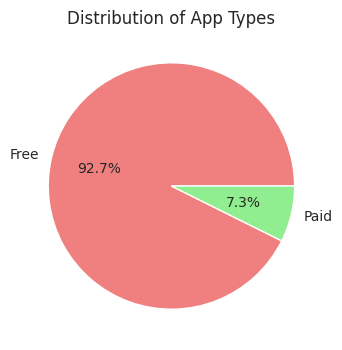

In [ ]:
# distribution of App types
plt.figure(figsize=(6, 4))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of App Types')
plt.ylabel('')
plt.show()

1. 

a) Bar chart for Number of Apps per Category

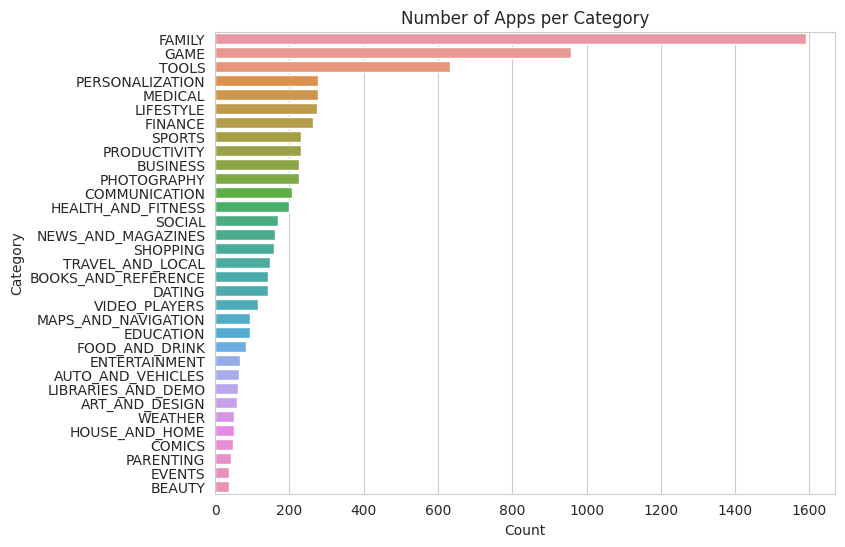

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

b) Grouped Bar Chart with Installs and Reviews for Top 5 Categories

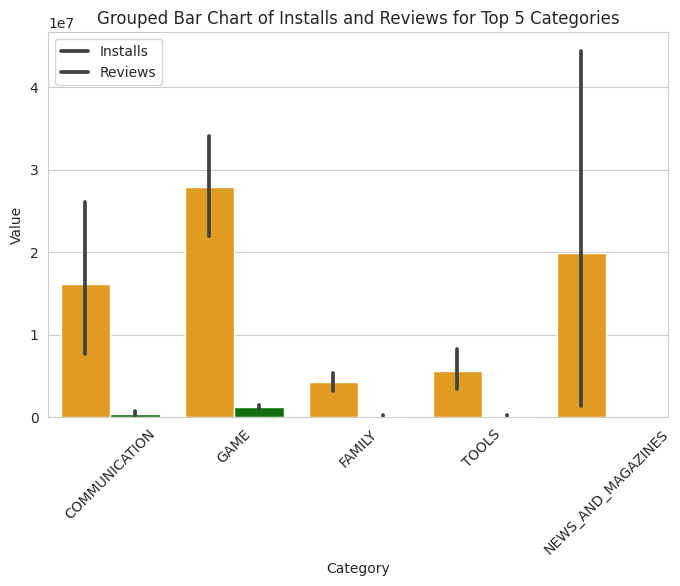

In [ ]:
top_categories = df.groupby('Category')['Installs'].sum().nlargest(5).index

# Filter DataFrame for the top 5 categories
df_top5 = df[df['Category'].isin(top_categories)]

df_melted = pd.melt(df_top5, id_vars=['Category'], value_vars=['Installs', 'Reviews'])
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='value', hue='variable', data=df_melted, palette=['orange', 'green'])
plt.title('Grouped Bar Chart of Installs and Reviews for Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend(title=None, labels=['Installs', 'Reviews'])
plt.xticks(rotation=45)
plt.show()

c) Stacked Bar Chart with Installs and Reviews for Top 5 Categories

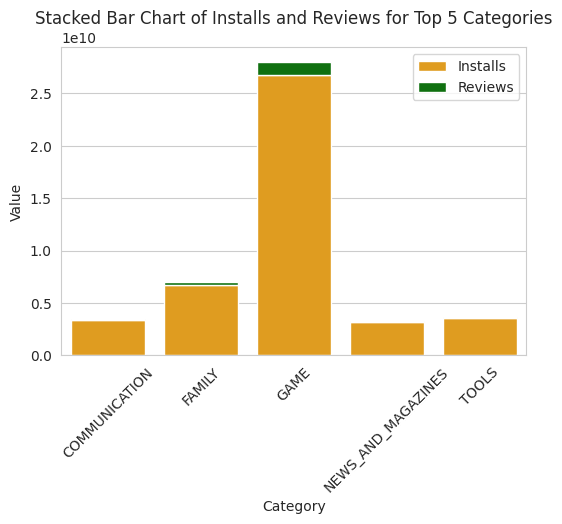

In [ ]:
grouped_df_top5 = df_top5.groupby('Category').agg({'Installs': 'sum', 'Reviews': 'sum'}).reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Installs', data=grouped_df_top5, color='orange', label='Installs')
sns.barplot(x='Category', y='Reviews', data=grouped_df_top5, color='green', label='Reviews', bottom=grouped_df_top5['Installs'])
plt.title('Stacked Bar Chart of Installs and Reviews for Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

d) Dot Plot of Rating by Category

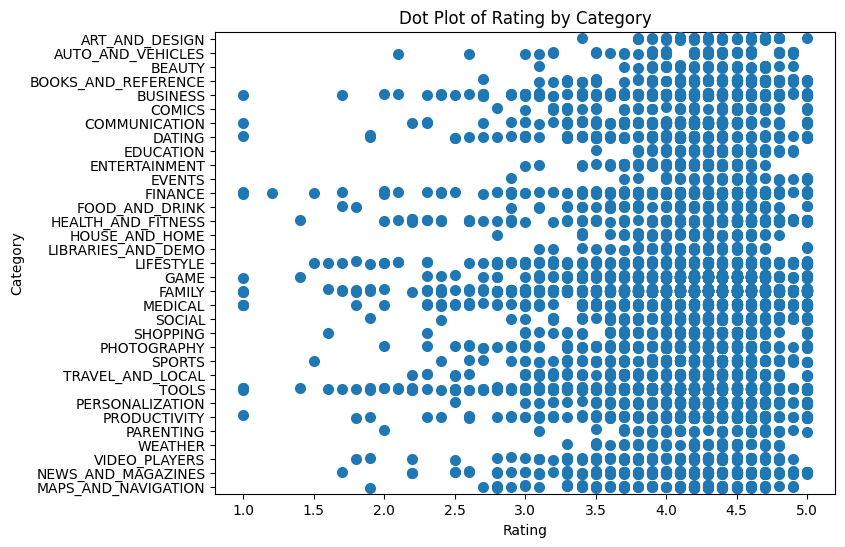

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Rating', y='Category', data=df, size=8, jitter=True)
plt.title('Dot Plot of Rating by Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

e) Heatmap of all numeric variables.

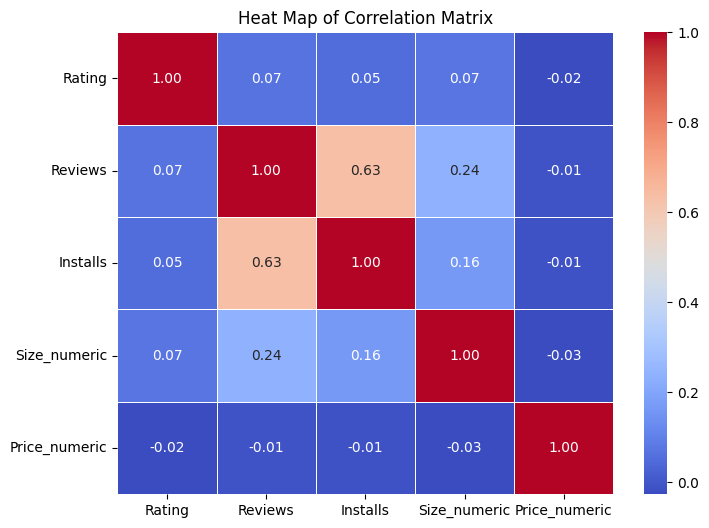

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heat Map of Correlation Matrix')
plt.show()

2. 

a) Distribution of App Ratings

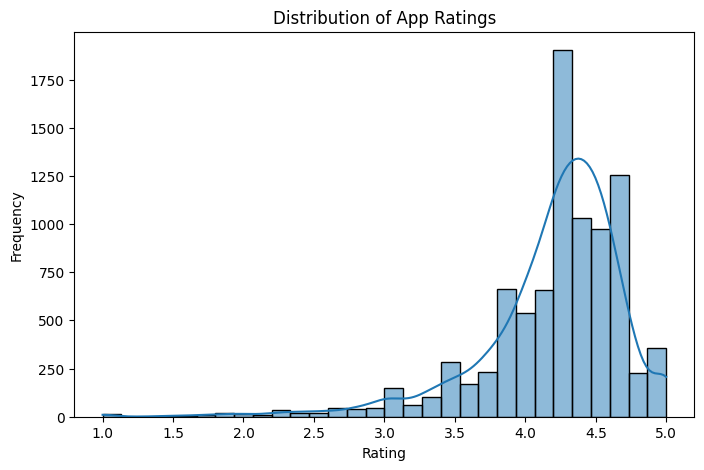

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

b) Density Plot of Ratings columns

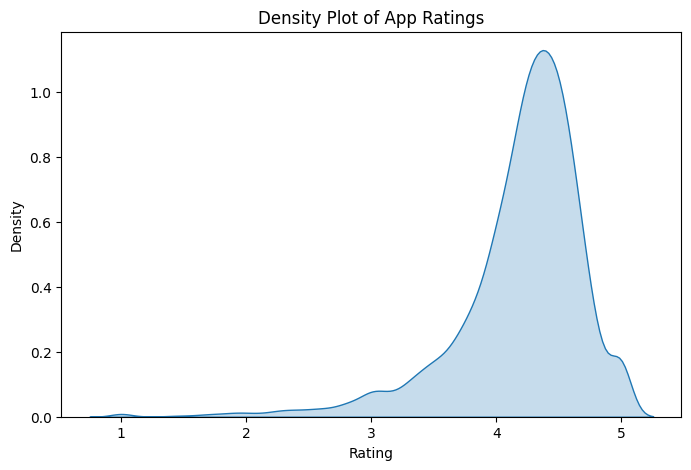

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Rating', fill=True)
plt.title('Density Plot of App Ratings')
plt.show()

c) Violin Plot of App Sizes

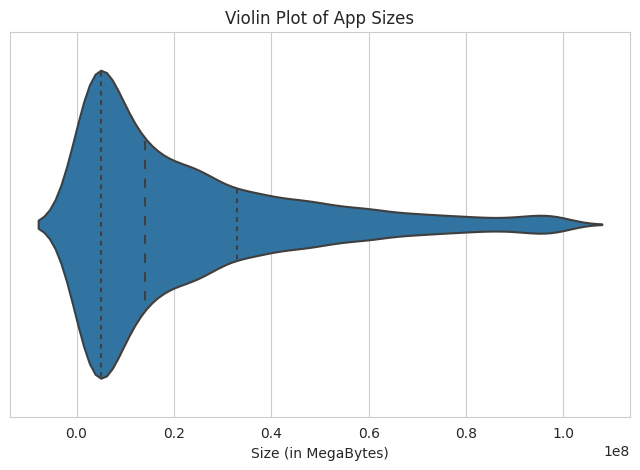

In [ ]:
plt.figure(figsize=(8,5))
df = df[df['Size_numeric'].notnull()]
sns.violinplot(data=df, x='Size_numeric', inner="quartile")
plt.title('Violin Plot of App Sizes')
plt.xlabel('Size (in MegaBytes)')
plt.show()

d) Strip chart for Distribution of Ratings Across Top Genres

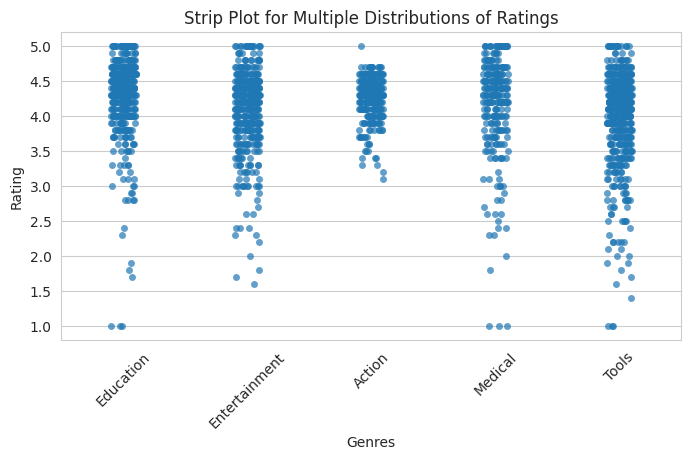

In [ ]:
top_genres = df['Genres'].value_counts().nlargest(5).index
df_top_genres = df[df['Genres'].isin(top_genres)]

# Strip plot for multiple distributions
plt.figure(figsize=(8,4))
sns.stripplot(x='Genres', y='Rating', data=df_top_genres, jitter=True, alpha=0.7)
plt.title('Strip Plot for Multiple Distributions of Ratings')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

e) Density plot for Distribution of Ratings Across Top 5 Genres

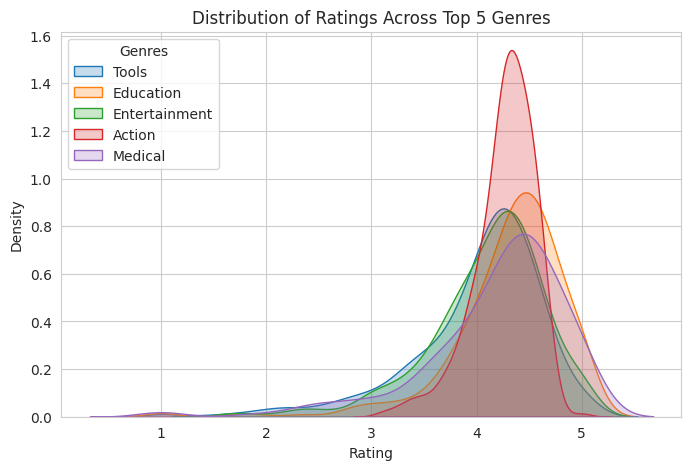

In [ ]:
plt.figure(figsize=(8,5))
for genre in top_genres:
    sns.kdeplot(df_top_genres[df_top_genres['Genres'] == genre]['Rating'], label=genre, fill=True)
plt.title('Distribution of Ratings Across Top 5 Genres')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend(title='Genres', loc='upper left')
plt.show()

3. 

a) Empirical Cumulative Distribution Function plot for the Rating column

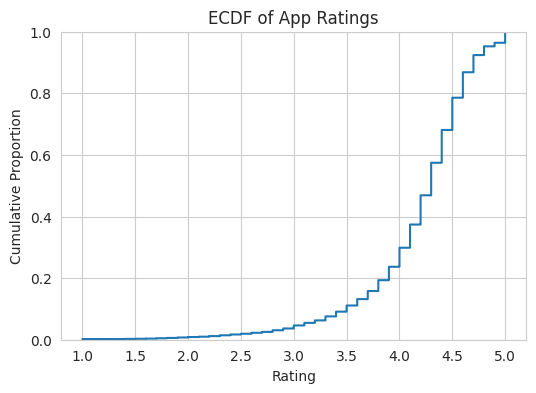

In [ ]:
plt.figure(figsize=(6,4))
sns.ecdfplot(data=df, x='Rating')
plt.title('ECDF of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Cumulative Proportion')
plt.show()

b) Log-Transformed Empirical Cumulative Distribution Function of App Ratings

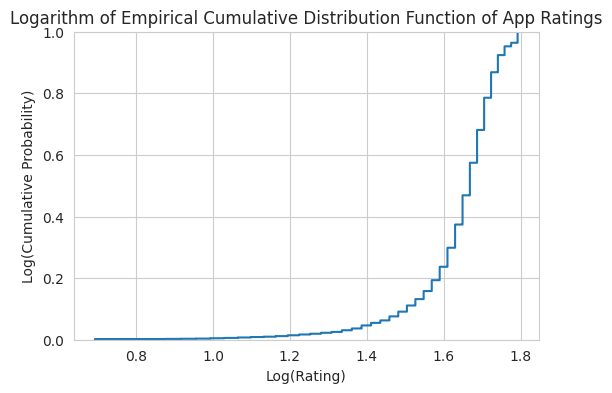

In [ ]:
log_ratings = np.log1p(df['Rating'])
plt.figure(figsize=(6,4))
sns.ecdfplot(data=log_ratings)
plt.title('Logarithm of Empirical Cumulative Distribution Function of App Ratings')
plt.xlabel('Log(Rating)')
plt.ylabel('Log(Cumulative Probability)')
plt.show()

c) Log-Transformed Density Plot of App Ratings

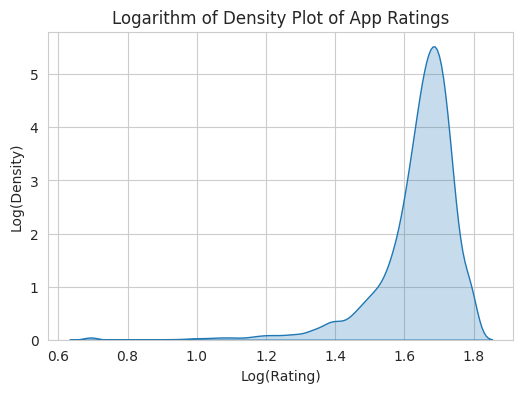

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=log_ratings, fill=True)
plt.title('Logarithm of Density Plot of App Ratings')
plt.xlabel('Log(Rating)')
plt.ylabel('Log(Density)')
plt.show()

d) Quantile-Quantile plot for the Rating column

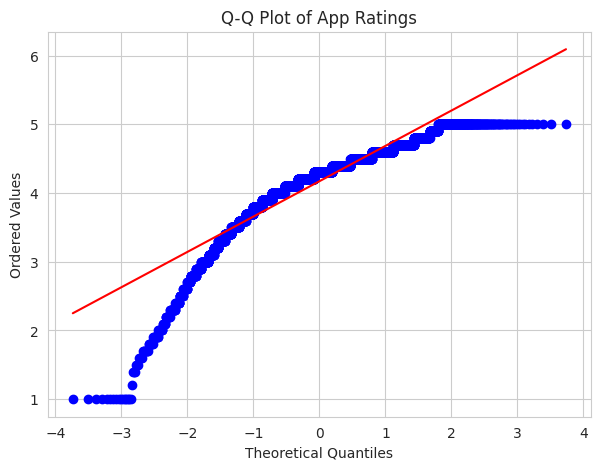

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(7,5))
stats.probplot(df['Rating'], dist="norm", plot=plt)
plt.title('Q-Q Plot of App Ratings')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

e) Histogram of the log-transformed 'Reviews' column (Skewed Distribution)

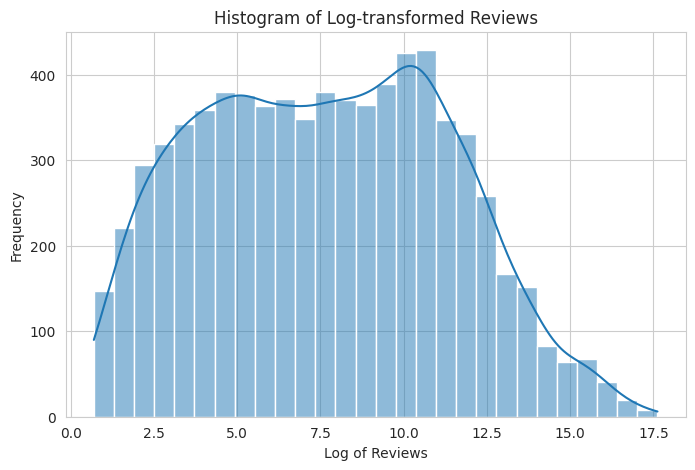

In [ ]:
# Apply log transformation to the 'Reviews' column
df['Log_Reviews'] = np.log1p(df['Reviews'])

# Create a histogram of the log-transformed 'Reviews' column
plt.figure(figsize=(8, 5))
sns.histplot(df['Log_Reviews'], kde=True)
plt.title('Histogram of Log-transformed Reviews')
plt.xlabel('Log of Reviews')
plt.ylabel('Frequency')
plt.show()

4.

a) Strip Plot for Installs Across Content Ratings

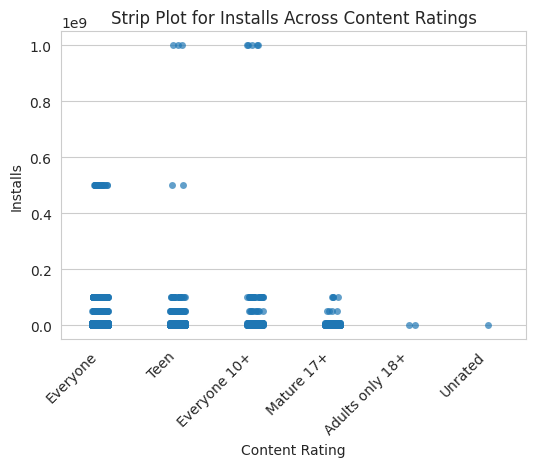

In [ ]:
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Content Rating', y='Installs', jitter=True, alpha=0.7)
plt.title('Strip Plot for Installs Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.xticks(rotation=45, ha='right')
plt.show()

b) Box Plot for Ratings Across Genres

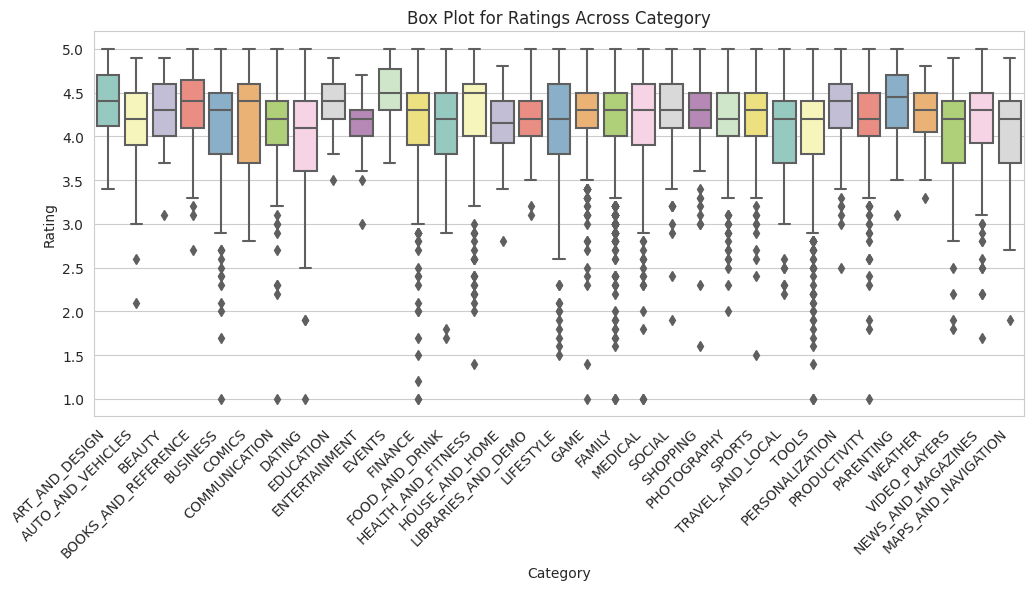

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Category', y='Rating', palette='Set3')
plt.title('Box Plot for Ratings Across Category')
plt.xticks(rotation=45, ha='right')
plt.show()

c) Violin Plot for Ratings Distribution by Type

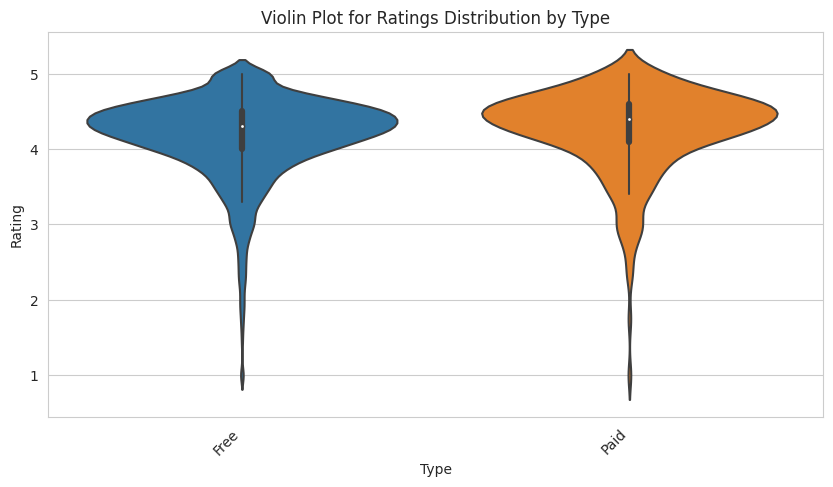

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, y='Rating', x='Type')
plt.title('Violin Plot for Ratings Distribution by Type')
plt.xticks(rotation=45, ha='right')
plt.show()

d) Bar Plot for Installs by Content Rating

<ipython-input-203-eee29e79c84c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Installs', y='Content Rating',ci=None)


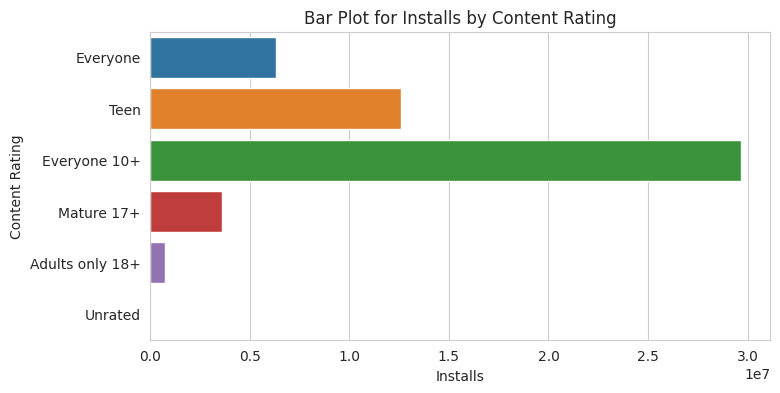

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Installs', y='Content Rating',ci=None)
plt.title('Bar Plot for Installs by Content Rating')
plt.show()

e) Ridgeline Plot for Ratings Across Content Ratings

<ipython-input-226-afe000a2d764>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Rating', hue='Content Rating', fill=True, common_norm=False, palette='viridis')


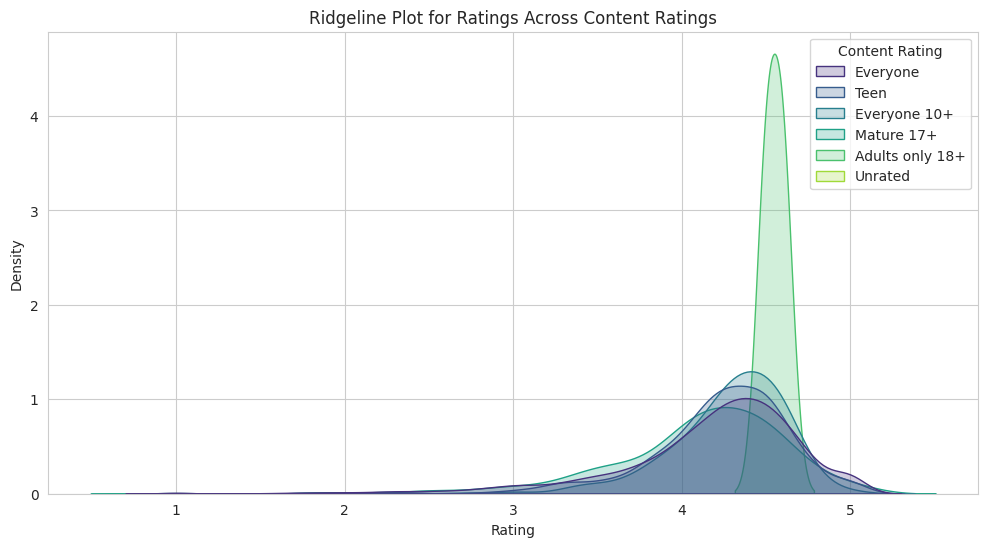

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='Rating', hue='Content Rating', fill=True, common_norm=False, palette='viridis')
plt.title('Ridgeline Plot for Ratings Across Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()